In [6]:
import seaborn as sns
sns.set(rc={'axes.facecolor': 'dimgrey', 'grid.color': 'lightgrey'})
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [7]:
%run utils.ipynb

In [8]:
# class 1 is illicit, 2 is licit, unknown is unknown
labels = pd.read_csv("data/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges = pd.read_csv("data/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
nodes = pd.read_csv("data/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
print('done')

done


In [9]:
data, graph_info = time_step_split(nodes_new, edges_new, labels_new, device)
for key in data:
    print(key, len(data[key]))

train 31
val 5
test 13


In [19]:
# computes the ratios of licit / illicit nodes in the graph
ratios = []
nb_licit = []
nb_illicit = []
nb_unknown = []

for key in data:
    for sub_graph in data[key]:
        illicit_idx = (sub_graph.y == 0).nonzero(as_tuple=True)[0]
        licit_idx   = (sub_graph.y == 1).nonzero(as_tuple=True)[0]
        unknown_idx = (sub_graph.y == 2).nonzero(as_tuple=True)[0]
        ratio = len(illicit_idx) / len(licit_idx)

        ratios.append(ratio)
        nb_licit.append(len(licit_idx))
        nb_illicit.append(len(illicit_idx))
        nb_unknown.append(len(unknown_idx))


[5733, 3427, 5342, 4253, 4921, 3843, 4845, 3292, 4218, 5755, 3600, 1541, 3719, 1605, 3021, 2445, 2574, 1587, 2761, 3391, 2896, 4131, 2978, 3466, 1720, 2006, 883, 1369, 3101, 1959, 2106, 3202, 2710, 1971, 4166, 4685, 2808, 2135, 1577, 3270, 4210, 4986, 3693, 3384, 4377, 2807, 4275, 2483, 1978]


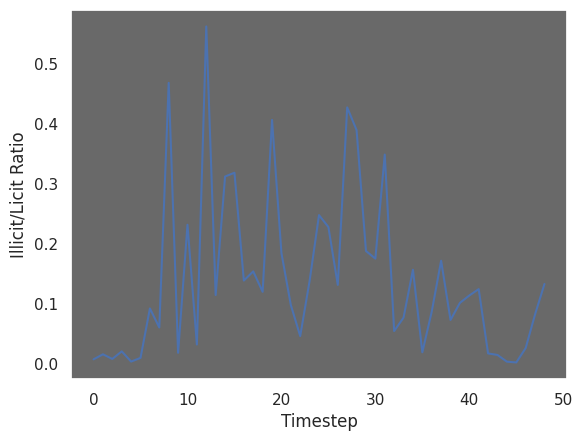

In [16]:
plt.plot(ratios)
plt.grid()
plt.ylabel("Illicit/Licit Ratio")
plt.xlabel('Timestep')
plt.show()

[2130 1099 1268 1410 1874  480 1101 1098  530  954  565  490  518  374
  471  402  712  337  665  640  541 1605 1134  989  476  421  182  199
  845  441  604  981  418  478 1159 1675  458  645 1102 1099 1016 1915
 1346 1567 1216  710  824  435  420]
[ 17  18  11  30   8   5 102  67 248  18 131  16 291  43 147 128  99  52
  80 260 100 158  53 137 118  96  24  85 329  83 106 342  23  37 182  33
  40 111  81 112 116 239  24  24   5   2  22  36  56]
[5733 3427 5342 4253 4921 3843 4845 3292 4218 5755 3600 1541 3719 1605
 3021 2445 2574 1587 2761 3391 2896 4131 2978 3466 1720 2006  883 1369
 3101 1959 2106 3202 2710 1971 4166 4685 2808 2135 1577 3270 4210 4986
 3693 3384 4377 2807 4275 2483 1978]


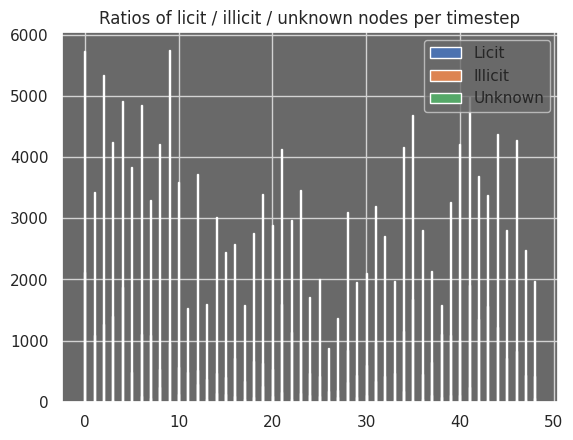

In [31]:
label_counts = {
    "Licit" : np.array(nb_licit),
    "Illicit" : np.array(nb_illicit),
    "Unknown" : np.array(nb_unknown)
}

fig, ax = plt.subplots()
bottom = np.zeros(49)

for boolean, count in label_counts.items():
    print(count)
    p = ax.bar((np.arange(49)), count, 0.1, label=boolean, bottom=bottom)


ax.set_title("Ratios of licit / illicit / unknown nodes per timestep")
ax.legend(loc="upper right")

plt.show()

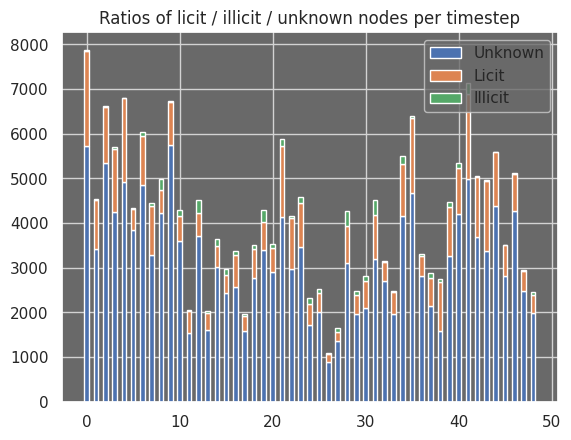

In [35]:
import matplotlib.pyplot as plt
import numpy as np


species = (np.arange(49))
counts = {
    "Unknown" : np.array(nb_unknown),
    "Licit" : np.array(nb_licit),
    "Illicit" : np.array(nb_illicit),

}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(49)

for boolean, count in counts.items():
    p = ax.bar(species, count, width, label=boolean, bottom=bottom)
    bottom += count

ax.set_title("Ratios of licit / illicit / unknown nodes per timestep")
ax.legend(loc="upper right")

plt.show()